In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

2024-09-24 13:01:22.541493: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load the MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

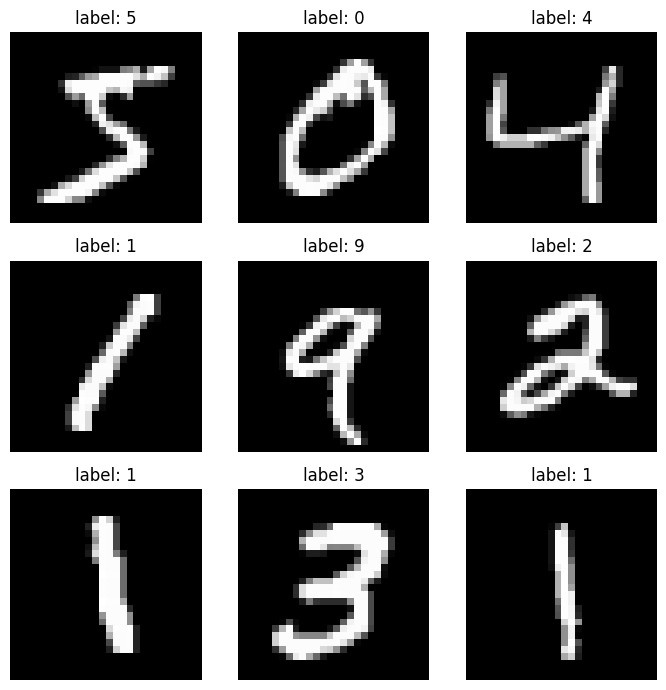

In [3]:
# view some example images from the training dataset

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# pre-process data: normalize pixel values to the [0, 1] range

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
# if necessary, reshape data as required by the model input shape

In [5]:
# one-hot encode labels

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
# build the sequential model

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # flatten the 28x28 images into 784-dimensional vectors
model.add(Dense(128, activation='relu')) # add a fully-connected layer with 128 neurons and ReLU activation function
model.add(Dense(10, activation='softmax')) # output layer with 10 neurons (one per class) and softmax activation function

/Users/gianfrishow/my_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# print a summary of the model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# train the model

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8736 - loss: 0.4532 - val_accuracy: 0.9675 - val_loss: 0.1195
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9621 - loss: 0.1286 - val_accuracy: 0.9718 - val_loss: 0.1031
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9729 - loss: 0.0863 - val_accuracy: 0.9785 - val_loss: 0.0782
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9822 - loss: 0.0622 - val_accuracy: 0.9762 - val_loss: 0.0815
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9782 - val_loss: 0.0697


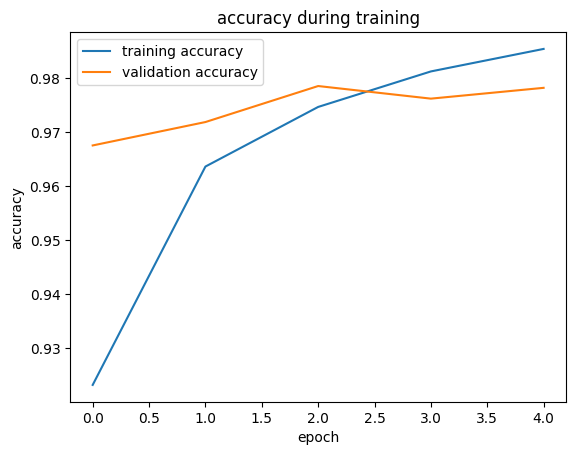

In [12]:
# accuracy plot

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy during training')
plt.show()

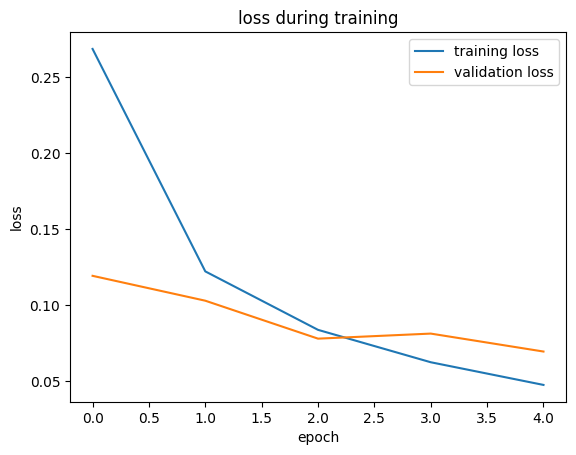

In [13]:
# loss plot

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('loss during training')
plt.show()

In [14]:
# evaluate performance on the test dataset

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nAccuracy on test dataset: {100*test_acc:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9731 - loss: 0.0900

Accuracy on test dataset: 97.67%


In [15]:
# predict the test dataset

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
predicted_classes = np.argmax(predictions, axis=1)
# returns indices of the maximum predicted values (in this case coinciding with labels since they're digits from 0 to 9)

true_classes = np.argmax(y_test, axis=1)

In [22]:
print(predicted_classes[:30], true_classes[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1] [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [16]:
# function to plot an image and its prediction

def plot_image_prediction(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel(f"Pred: {predicted_label} ({100*np.max(predictions_array):.2f}%)\nTrue: {true_label}", color=color)

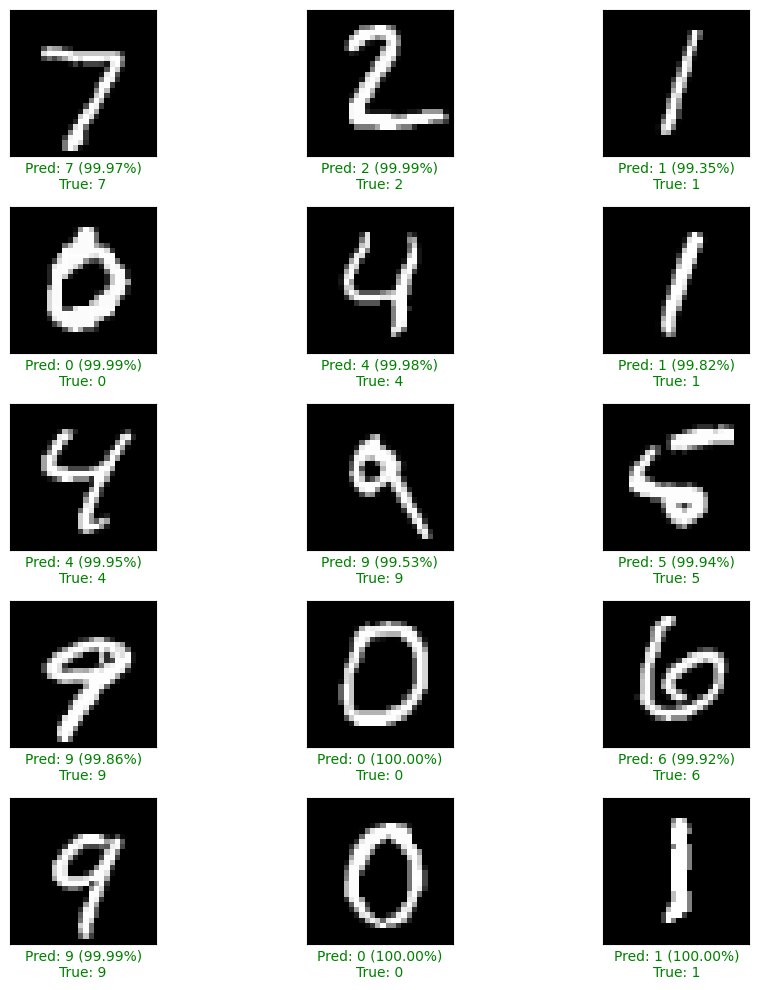

In [17]:
# view some images and their predictions

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image_prediction(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()

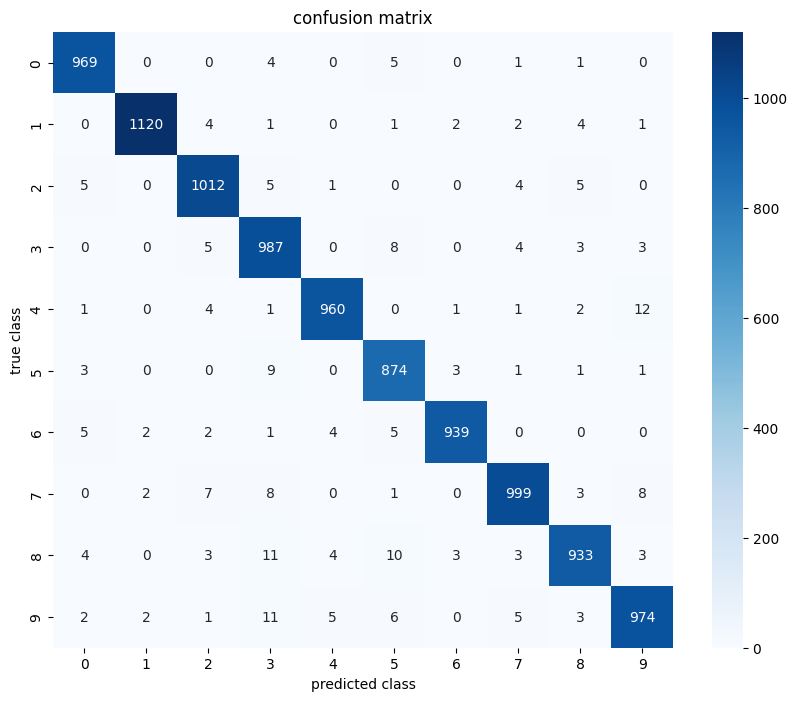

In [25]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.show()

In [26]:
# classfication report

from sklearn.metrics import classification_report
report = classification_report(true_classes,predicted_classes)
print(f'classification report:\n{report}')

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.98      0.96      1010
           4       0.99      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

